R notebook
--

In [ ]:
# This notebook runs R code
# Tip: to launch new R-notebook go to https://colab.research.google.com/notebook#create=true&language=r 
# or using short url https://colab.to/r 

# Health - Life Expectancy at Birth stats for Lewisham.
# Fetches data from Fingertips, a large repository of public health indicators managed by Public Health England. 
# Loads data and prepares it for use in Lewisham ward profiles.
# Data available at MSOA level

In [ ]:
# libraries "shiny", "shinycssloaders", "miniUI" and "DT" installed as dependencies for fingertipsR
# see here: https://github.com/ropensci/fingertipsR/issues/96 &
# here https://github.com/ropensci/fingertipsR/issues/96#issuecomment-842421612 

In [ ]:
install.packages("shiny")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sass’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘bslib’




In [ ]:
install.packages("shinycssloaders")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("miniUI")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("DT")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘htmlwidgets’, ‘crosstalk’




In [ ]:
install.packages("remotes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
remotes::install_github("rOpenSci/fingertipsR",
                        build_vignettes = TRUE,
                        dependencies = "suggests")

✔  checking for file ‘/tmp/RtmpwTw3nH/remotes3c76c0a5db/ropensci-fingertipsR-77bd9a1/DESCRIPTION’
─  preparing ‘fingertipsR’:
✔  checking DESCRIPTION meta-information
─  installing the package to build vignettes
✔  creating vignettes (6s)
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘fingertipsR_1.0.7.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("ggtext")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘markdown’, ‘RCurl’, ‘png’, ‘jpeg’, ‘gridtext’




In [ ]:
library(tidyverse)
library(fingertipsR)
library(ggtext)
library(ggplot2)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# TODO: check for googledrive install for file structure


In [ ]:
# calling 'indicators()' function to return a list of all the indicators within Fingertips
# contains 3810 public health indicators categorised by many domains
indicators <- indicators()
indicators

IndicatorID,IndicatorName,DomainID,DomainName,ProfileID,ProfileName
<int>,<fct>,<int>,<chr>,<int>,<chr>
113,Smoking attributable mortality (Old Method),1938132885,Key indicators,18,Local Tobacco Control Profiles
1207,Smoking attributable hospital admissions (Old Method),1938132885,Key indicators,18,Local Tobacco Control Profiles
1210,Smokers that have successfully quit at 4 weeks,1938132885,Key indicators,18,Local Tobacco Control Profiles
91183,Smoking prevalence age 15 years - regular smokers (SDD survey),1938132885,Key indicators,18,Local Tobacco Control Profiles
91184,Smoking prevalence age 15 years - occasional smokers (SDD survey),1938132885,Key indicators,18,Local Tobacco Control Profiles
92443,Smoking Prevalence in adults (18+) - current smokers (APS),1938132885,Key indicators,18,Local Tobacco Control Profiles
93085,Smoking status at time of delivery,1938132885,Key indicators,18,Local Tobacco Control Profiles
93382,Smoking prevalence in adults (18-64) - socio-economic gap in current smokers (APS),1938132885,Key indicators,18,Local Tobacco Control Profiles
93553,Deprivation score (IMD 2019),1938132885,Key indicators,18,Local Tobacco Control Profiles


In [ ]:
# calling function to return unique indicators
# from the table below we are interested in #93283	Life expectancy at birth
inds <- indicators_unique()
life_expectancy <- inds[grepl("life expectancy", tolower(inds$IndicatorName)),]
life_expectancy

IndicatorID,IndicatorName
<int>,<fct>
90362,Healthy life expectancy at birth
90366,Life expectancy at birth
90825,Inequality in healthy life expectancy at birth ENGLAND
91102,Life expectancy at 65
92031,Inequality in healthy life expectancy at birth LA
92901,Inequality in life expectancy at birth
93190,Inequality in life expectancy at 65
93505,Healthy life expectancy at 65
93523,Disability-free life expectancy at 65


In [ ]:
# Identify the area type of interest
# a check of the Fingertips website https://fingertips.phe.org.uk/search/Life%20expectancy 
# indicates that life expectancy stats are available at MSOA level 
# hence we are interested in AreaTypeID #3
area_types() %>%
  select(AreaTypeID, AreaTypeName) %>%
  distinct() %>% 
  View()

AreaTypeID,AreaTypeName
<int>,<chr>
3,Middle Super Output Area
6,Government Office Region
7,General Practice
8,Ward
15,England
41,Ambulance Trust
46,"E39, former sub-region, former Local area teams)"
101,Lower tier local authorities (pre 4/19)
102,Upper tier local authorities (pre 4/19)


In [ ]:
# from above our query will include IndicatorID = 93283, AreaTypeID = 3
query <- fingertips_data(IndicatorID = 93283, AreaTypeID = 3)
query[1]

,IndicatorID
,<int>
1,93283
2,93283
3,93283
4,93283
5,93283
6,93283
7,93283
8,93283
9,93283


In [ ]:
# create a string object with the name of the local authority we are interested in, e.g. Lewisham
id <- "Lewisham"

In [ ]:
# combine above to extract dataframe
df <- fingertips_data(IndicatorID = 93283, AreaTypeID = 3) %>% 
  filter(ParentName == id | AreaName == "England",
         Timeperiod == "2015 - 19") %>% 
  select(AreaName, Sex, Value) %>% 
  pivot_wider(names_from = Sex, values_from = Value) %>% 
  mutate(GenderGap = Female-Male) %>% 
  pivot_longer(-c(AreaName, GenderGap), names_to = "Sex", values_to = "Value")

In [ ]:
head(df)

AreaName,GenderGap,Sex,Value
<chr>,<dbl>,<chr>,<dbl>
England,3.591974,Male,79.65707
England,3.591974,Female,83.24904
Lewisham 001,6.307751,Male,77.43846
Lewisham 001,6.307751,Female,83.74621
Lewisham 002,3.524702,Male,79.30568
Lewisham 002,3.524702,Female,82.83039


In [ ]:
# remove missing data
df2 <- df[complete.cases(df), ]
str(df2)

tibble [72 × 4] (S3: tbl_df/tbl/data.frame)
 $ AreaName : chr [1:72] "England" "England" "Lewisham 001" "Lewisham 001" ...
 $ GenderGap: num [1:72] 3.59 3.59 6.31 6.31 3.52 ...
 $ Sex      : chr [1:72] "Male" "Female" "Male" "Female" ...
 $ Value    : num [1:72] 79.7 83.2 77.4 83.7 79.3 ...


In [ ]:
# check that missing values are removed
M <- sapply(df2, function(x) sum(is.na(x)))
M

AreaName GenderGap       Sex     Value 
        0         0         0         0

In [ ]:
# note: only short names for MSOAs included, need to get lookup for 'long' names
# e.g. Lewisham 001 == Silwood & Pepys
head(df2)

AreaName,GenderGap,Sex,Value
<chr>,<dbl>,<chr>,<dbl>
England,3.591974,Male,79.65707
England,3.591974,Female,83.24904
Lewisham 001,6.307751,Male,77.43846
Lewisham 001,6.307751,Female,83.74621
Lewisham 002,3.524702,Male,79.30568
Lewisham 002,3.524702,Female,82.83039


In [ ]:
# summary of the data, helps to get min, max values for age
summary(df2)

   AreaName           GenderGap         Sex                Value      
 Length:72          Min.   :1.549   Length:72          Min.   :73.55  
 Class :character   1st Qu.:3.575   Class :character   1st Qu.:79.61  
 Mode  :character   Median :4.140   Mode  :character   Median :81.88  
                    Mean   :4.697                      Mean   :81.62  
                    3rd Qu.:6.208                      3rd Qu.:83.67  
                    Max.   :8.556                      Max.   :89.32  

In [ ]:
# save this batch of data
write.csv(df2, file='df2_test_life_exp_msoa.csv')

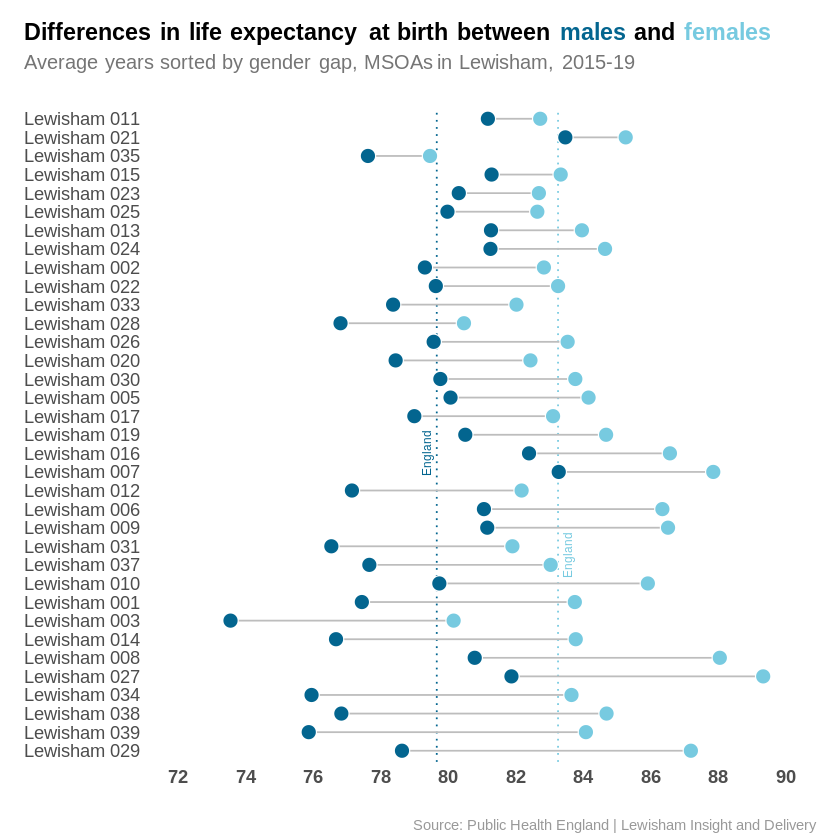

In [ ]:
ggplot(data = filter(df2, AreaName != "England"),
       aes(x = fct_reorder2(AreaName, Value, GenderGap, .desc = TRUE), y = Value)) +
  geom_hline(yintercept = pull(filter(df, AreaName == "England", Sex == "Female"),Value), 
             colour = "#77CAE0", linetype = "dotted") +
  geom_hline(yintercept = pull(filter(df, AreaName == "England", Sex == "Male"),Value), 
             colour = "#03658F", linetype = "dotted") +
  geom_line(color = "#bdbdbd", size = 0.5) +
  geom_point(aes(fill = Sex), size = 4, shape = 21, colour = "#FFFFFF", show.legend = FALSE) +
  geom_richtext(aes(x = 17, y = 79.4, label = "<span style = 'color:#03658F;'>England</span>"), 
                size = 2.5, angle = 90, color = "#212121", lineheight = .9,
                fill = NA, label.color = NA, stat = "unique") +
  geom_richtext(aes(x = 11.5, y = 83.6, label = "<span style = 'color:#77CAE0;'>England</span>"), 
                size = 2.5, angle = 90, color = "#212121", lineheight = .9,
                fill = NA, label.color = NA, stat = "unique") +
  scale_colour_manual(values = c("Female" = "#77CAE0", "Male" = "#03658F")) +
  scale_fill_manual(values = c("Female" = "#77CAE0", "Male" = "#03658F")) +
  scale_y_continuous(limits = c(72,90), breaks = c(seq(72,90,2))) +
  labs(title = "Differences in life expectancy at birth between <span style = 'color:#03658F;'>males</span> and <span style = 'color:#77CAE0;'>females</span>",
       subtitle = "<span style = 'color:#757575;'>Average years sorted by gender gap, MSOAs in Lewisham, 2015-19</span>",
       caption = "Source: Public Health England | Lewisham Insight and Delivery",
       x = NULL, y = NULL) +
  coord_flip(clip = "off") +
  theme_minimal() +
  theme(plot.margin = unit(rep(0.5, 4), "cm"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        plot.title.position = "plot",
        plot.title = element_markdown(size = 14, face = "bold"),
        plot.subtitle = element_markdown(size = 12, margin = margin(b = 20)),
        plot.caption = element_text(colour = "grey60", margin = margin(t = 20, b = -10)),
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 11, hjust = 0)) 


Plot with data that includes lookups for MSOAs names
--

In [ ]:
lbl_life_exp <- read.csv('lbl_life_exp_msoa11_nm.csv')

In [ ]:
head(lbl_life_exp)

,X,AreaName,AreaName_NM,GenderGap,Sex,Value
,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,1,England,England,3.591974,Male,79.65707
2,2,England,England,3.591974,Female,83.24904
3,3,Lewisham 001,Silwood & Pepys,6.307751,Male,77.43846
4,4,Lewisham 001,Silwood & Pepys,6.307751,Female,83.74621
5,5,Lewisham 002,Deptford North,3.524702,Male,79.30568
6,6,Lewisham 002,Deptford North,3.524702,Female,82.83039


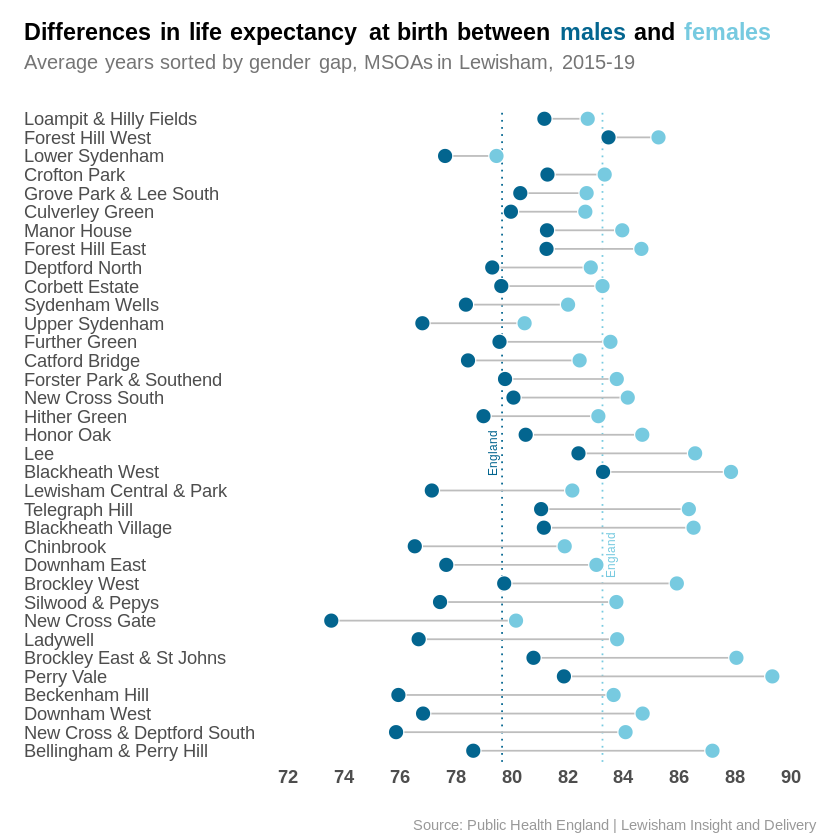

In [ ]:
ggplot(data = filter(lbl_life_exp, AreaName_NM != "England"),
       aes(x = fct_reorder2(AreaName_NM, Value, GenderGap, .desc = TRUE), y = Value)) +
  geom_hline(yintercept = pull(filter(lbl_life_exp, AreaName_NM == "England", Sex == "Female"),Value), 
             colour = "#77CAE0", linetype = "dotted") +
  geom_hline(yintercept = pull(filter(lbl_life_exp, AreaName_NM == "England", Sex == "Male"),Value), 
             colour = "#03658F", linetype = "dotted") +
  geom_line(color = "#bdbdbd", size = 0.5) +
  geom_point(aes(fill = Sex), size = 4, shape = 21, colour = "#FFFFFF", show.legend = FALSE) +
  geom_richtext(aes(x = 17, y = 79.4, label = "<span style = 'color:#03658F;'>England</span>"), 
                size = 2.5, angle = 90, color = "#212121", lineheight = .9,
                fill = NA, label.color = NA, stat = "unique") +
  geom_richtext(aes(x = 11.5, y = 83.6, label = "<span style = 'color:#77CAE0;'>England</span>"), 
                size = 2.5, angle = 90, color = "#212121", lineheight = .9,
                fill = NA, label.color = NA, stat = "unique") +
  scale_colour_manual(values = c("Female" = "#77CAE0", "Male" = "#03658F")) +
  scale_fill_manual(values = c("Female" = "#77CAE0", "Male" = "#03658F")) +
  scale_y_continuous(limits = c(72,90), breaks = c(seq(72,90,2))) +
  labs(title = "Differences in life expectancy at birth between <span style = 'color:#03658F;'>males</span> and <span style = 'color:#77CAE0;'>females</span>",
       subtitle = "<span style = 'color:#757575;'>Average years sorted by gender gap, MSOAs in Lewisham, 2015-19</span>",
       caption = "Source: Public Health England | Lewisham Insight and Delivery",
       x = NULL, y = NULL) +
  coord_flip(clip = "off") +
  theme_minimal() +
  theme(plot.margin = unit(rep(0.5, 4), "cm"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        plot.title.position = "plot",
        plot.title = element_markdown(size = 14, face = "bold"),
        plot.subtitle = element_markdown(size = 12, margin = margin(b = 20)),
        plot.caption = element_text(colour = "grey60", margin = margin(t = 20, b = -10)),
        axis.text.x = element_text(size = 11, face = "bold"),
        axis.text.y = element_text(size = 11, hjust = 0)) 


In [ ]:
write.csv(lbl_life_exp, file='lbl_data_life_exp_at_birth_msoa11_nm.csv')
#ggsave("plot.svg", dpi = 300, scale = 1)
ggsave("lbl_life_exp_birth.png", dpi = 300)

Saving 6.67 x 6.67 in image

